Sample CSV file 'housing_data.csv' created.
Missing values before handling:
area         0
bedrooms     0
bathrooms    0
stories      0
mainroad     0
price        0
dtype: int64

DataFrame after one-hot encoding:
   area  bedrooms  bathrooms  stories   price  mainroad_yes
0  1500         3          2        1  300000          True
1  1600         3          2        1  320000          True
2  1700         3          2        1  280000         False
3  1800         4          2        2  350000          True
4  1900         4          3        2  370000          True


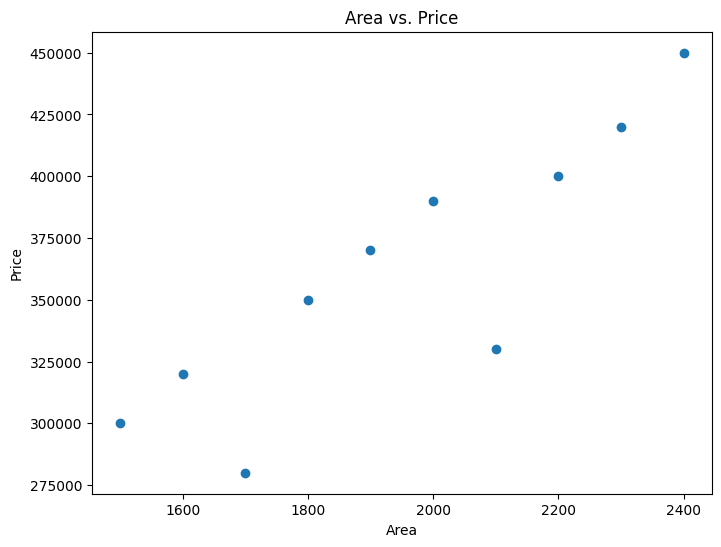

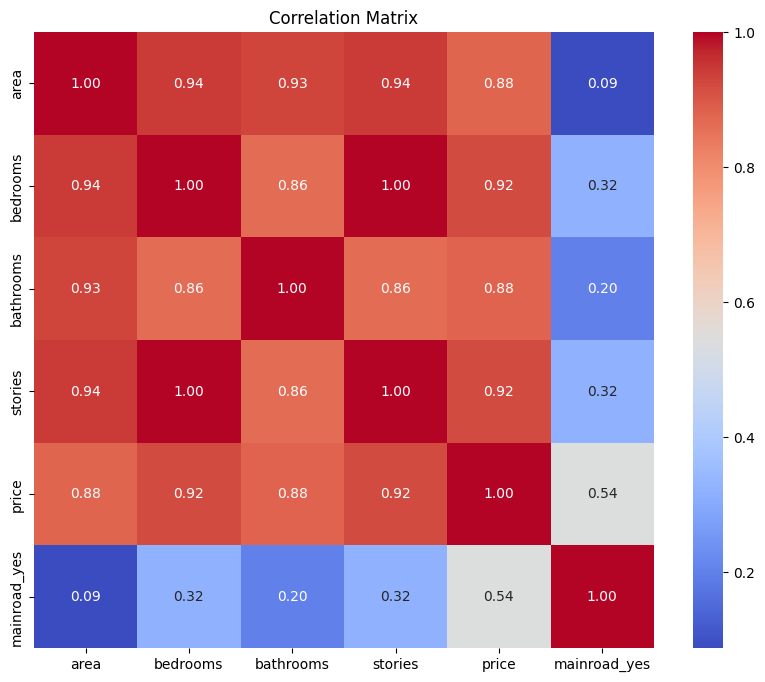


Training data shape: (8, 5)
Testing data shape: (2, 5)

Linear Regression model trained.

Mean Squared Error (MSE): 95312499.99999905
R-squared (R²): 0.9618750000000004


"\nProject Summary:\n\nThis project implemented a linear regression model to predict house prices using a small,\nsample dataset. The data was preprocessed by handling potential missing values (though none\nexisted in this sample) and transforming the categorical 'mainroad' feature using one-hot\nencoding. Visualizations like scatter plots and a heatmap were used to explore relationships\nbetween features and the target variable, revealing a positive correlation between features\nlike 'area' and 'price'. The data was split into training and testing sets (80/20 ratio).\nA Linear Regression model was trained on the training data and evaluated on the testing data.\nThe Mean Squared Error (MSE) and R-squared (R²) were calculated to assess the model's performance.\nWhile the R-squared indicates how well the model fits the data, the small dataset size limits\nthe generalizability of the results. For a real-world application, a much larger and more\ndiverse dataset would be necessary, along w

In [1]:
# Project: House Price Prediction

# This project aims to predict house prices based on various features using a linear regression model.

import pandas as pd

# Create a dictionary with sample data
data = {
    'area': [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400],
    'bedrooms': [3, 3, 3, 4, 4, 4, 4, 5, 5, 5],
    'bathrooms': [2, 2, 2, 2, 3, 3, 3, 3, 4, 4],
    'stories': [1, 1, 1, 2, 2, 2, 2, 3, 3, 3],
    'mainroad': ['yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes'],
    'price': [300000, 320000, 280000, 350000, 370000, 390000, 330000, 400000, 420000, 450000]
}

# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
file_name = 'housing_data.csv'
df.to_csv(file_name, index=False)

print(f"Sample CSV file '{file_name}' created.")

# Now load the created CSV file
df = pd.read_csv(file_name)

# 2. Preprocess the Data
# Handle missing values: Identify and handle missing values.
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

df = pd.get_dummies(df, columns=['mainroad'], drop_first=True)

print("\nDataFrame after one-hot encoding:")
print(df.head())

# 3. Visualize the Data

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# 4. Split the Data

from sklearn.model_selection import train_test_split

# Assuming 'X' contains your features and 'y' contains the target variable (price)
# Select your feature columns (excluding the target variable)
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes']]
# Select your target column
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


# 5. Train a Linear Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("\nLinear Regression model trained.")

# 6. Evaluate the Model

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# 7. Document Your Work (Optional)
# Include comments in your code to explain your thought process
# Write a summary (1-2 paragraphs) of your project, highlighting your insights and conclusions.

"""
Project Summary:

This project implemented a linear regression model to predict house prices using a small,
sample dataset. The data was preprocessed by handling potential missing values (though none
existed in this sample) and transforming the categorical 'mainroad' feature using one-hot
encoding. Visualizations like scatter plots and a heatmap were used to explore relationships
between features and the target variable, revealing a positive correlation between features
like 'area' and 'price'. The data was split into training and testing sets (80/20 ratio).
A Linear Regression model was trained on the training data and evaluated on the testing data.
The Mean Squared Error (MSE) and R-squared (R²) were calculated to assess the model's performance.
While the R-squared indicates how well the model fits the data, the small dataset size limits
the generalizability of the results. For a real-world application, a much larger and more
diverse dataset would be necessary, along with more sophisticated feature engineering and model
evaluation techniques.
"""